Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')


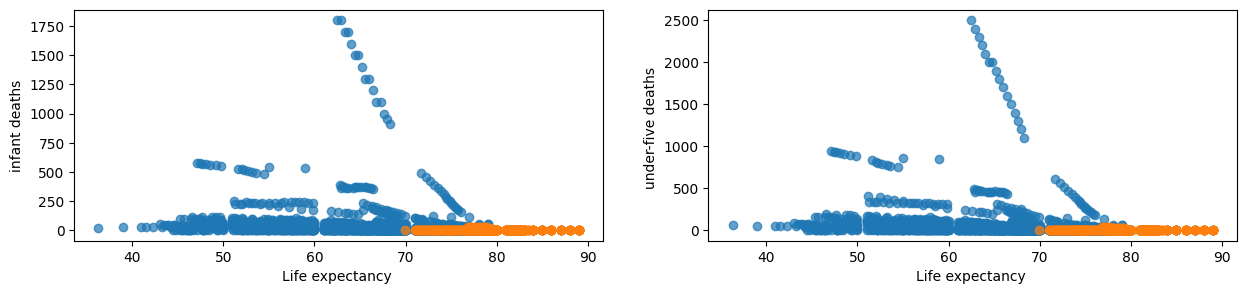

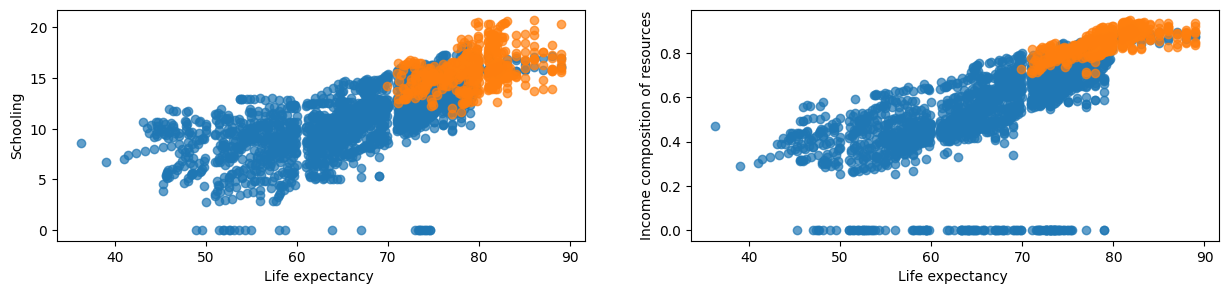

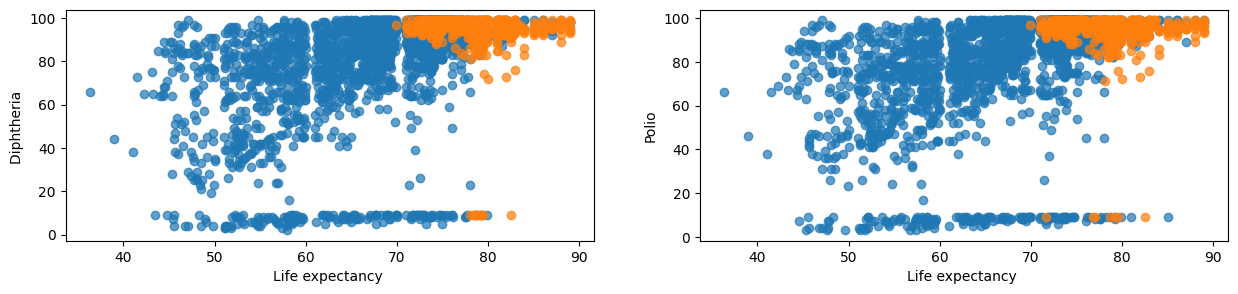

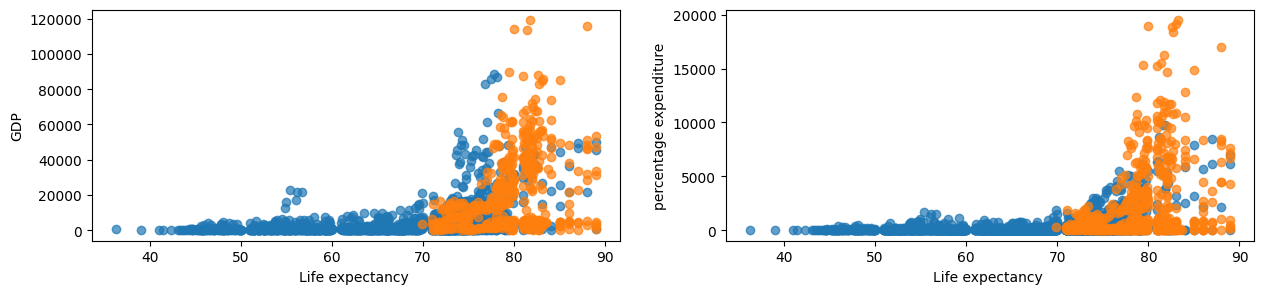

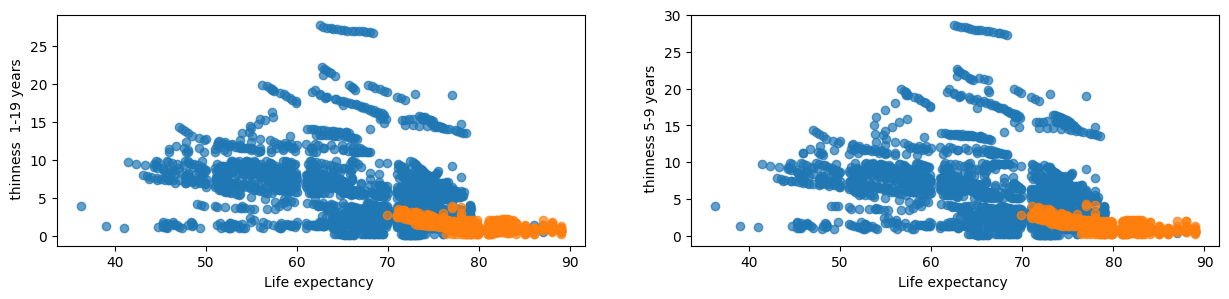

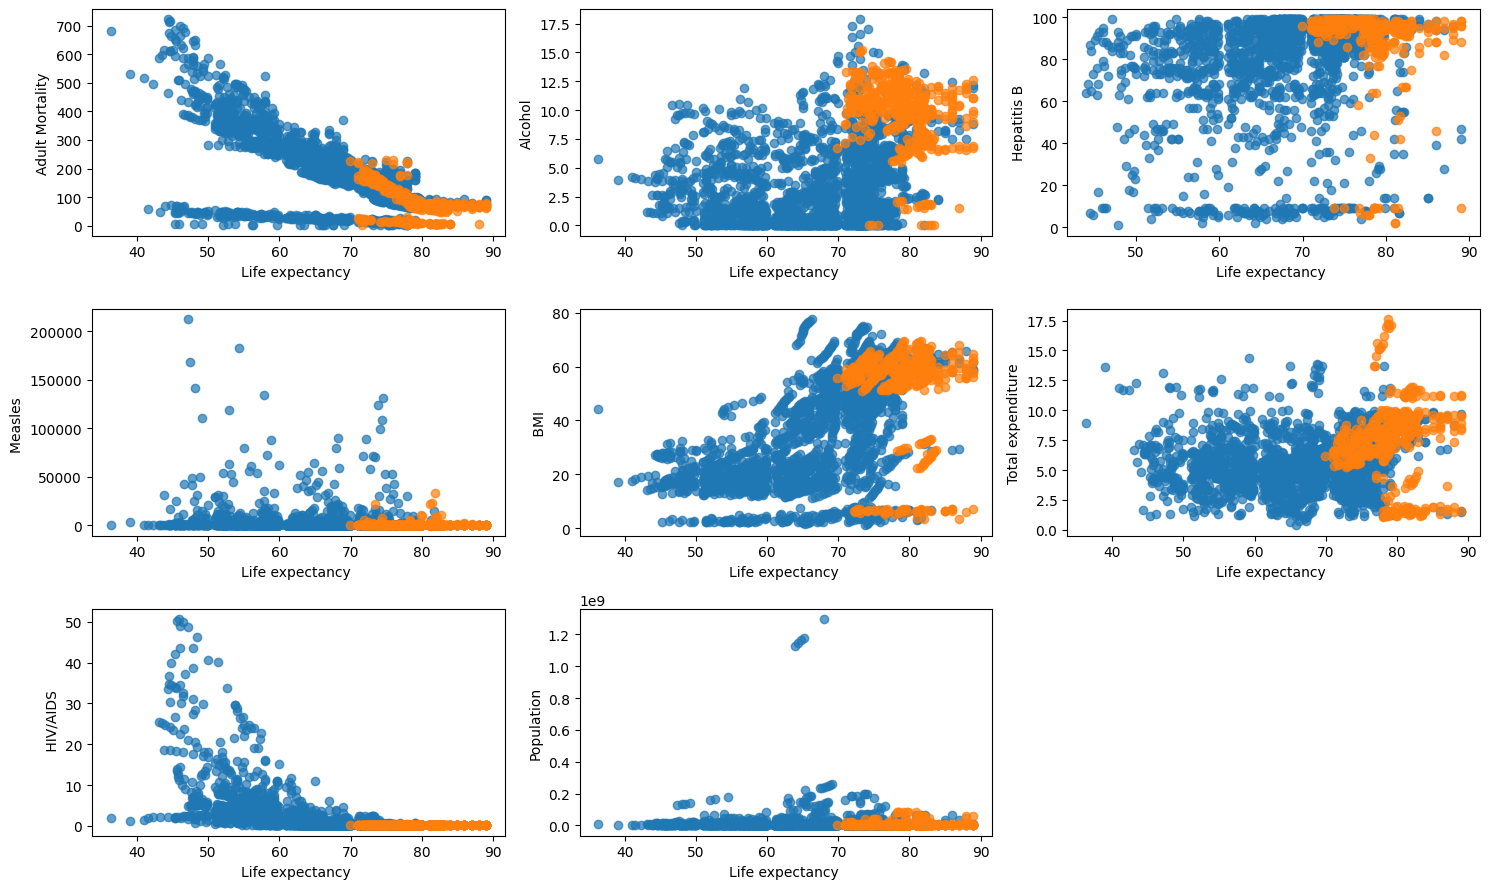

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from itertools import chain
from src.linear_regression import read_data_set

# import data as data frame
df = read_data_set()
cols = df.columns
print(cols)

# After close observation, I decided to display similar features in terms of plotting alongside each other
paired_features = [
    ["infant deaths", "under-five deaths "],
    ["Schooling", "Income composition of resources"],
    [
        "Diphtheria ",
        "Polio",
    ],
    ["GDP", "percentage expenditure"],
    [" thinness  1-19 years", " thinness 5-9 years"],
]
flattened_paired_features = list(chain(*paired_features))

# do not plot these features
archived_feature = ["Country", "Year", "Life expectancy ", "Status"]

# ================================
# Paired features
# ================================
for row in paired_features:
    plot_index = 0
    fig, axes = plt.subplots(1, len(row), figsize=(15, 3))
    axes = axes.flatten()

    for col in row:
        ax = axes[plot_index]

        for status in df["Status"].unique():
            subset = df[df["Status"] == status]
            ax.scatter(
                subset["Life expectancy "],
                subset[col],
                alpha=0.7,
            )
        ax.set_xlabel("Life expectancy ")
        ax.set_ylabel(col)
        plot_index += 1


# ================================
# Solo features
# ================================
# solo_features by removing flattened_paired_features and archived_feature
solo_features = [
    feature
    for feature in cols
    if feature not in flattened_paired_features + archived_feature
]
# define the number of rows and columns for subplots
num_cols_per_row = 3
num_rows = int(np.ceil((len(solo_features)) / num_cols_per_row))
fig, axes = plt.subplots(num_rows, num_cols_per_row, figsize=(15, 3 * num_rows))
axes = axes.flatten()
plot_index = 0

for col in solo_features:
    ax = axes[plot_index]

    for status in df["Status"].unique():
        subset = df[df["Status"] == status]
        ax.scatter(
            subset["Life expectancy "],
            subset[col],
            alpha=0.7,
        )
    ax.set_xlabel("Life expectancy ")
    ax.set_ylabel(col)
    plot_index += 1

# Remove any unused subplots
for i in range(plot_index, len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()